# 0. Overview
- This notebook handles the exploratory data analysis of the given dataset.


In [72]:
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

import seaborn as sns
from matplotlib import pyplot as plt

In [23]:
train_df = pickle.load(open('../data/processed/train_df.pkl', 'rb'))
val_df = pickle.load(open('../data/processed/val_df.pkl', 'rb'))
test_df = pickle.load(open('../data/processed/test_df.pkl', 'rb'))

In [24]:
X_train = train_df[['title_length', 'body_length']]
X_val = val_df[['title_length', 'body_length']]
X_test = test_df[['title_length', 'body_length']]

y_train = train_df.cleaned_y.values
y_val = val_df.cleaned_y.values
y_test = test_df.cleaned_y.values

In [25]:
all_data = pd.concat([train_df, val_df, test_df]).reset_index(drop = True)
all_data.shape

(60000, 11)

# 1. Distribution

In [ ]:
# Label Distibution

In [27]:
all_data.head(2)

,Id,Title,Body,Tags,CreationDate,Y,cleaned_y,body_notag,all_text,title_length,body_length
0,47236918,click edit button any record will fetch first ...,I have a problem\r\nWhen I click the Edit butt...,<php><html><mysql><sql>,2017-11-11 10:31:22,LQ_EDIT,1,have problem click edit button any record will...,click edit button any record will fetch first ...,12,90
1,43043808,to filter username harmful characters,<p>i really need help from you guys !!\nsome o...,<php><html>,2017-03-27 10:21:57,LQ_CLOSE,0,really need help you guys of friends scamming ...,to filter username harmful characters really n...,5,26


In [28]:
y_dist_data = all_data.groupby('cleaned_y').agg('count')['all_text']
# y_dist_data.plot.pie(autopct="%.1f%%");
y_dist_data

cleaned_y
0    20000
1    20000
2    20000
Name: all_text, dtype: int64

([<matplotlib.patches.Wedge at 0x7f618b8f2b00>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Label: LQ_CLOSE(0)'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Label: LQ_EDIT(1)'),
  Text(0.5500001486524352, -0.9526278583383436, 'Label: HQ(2)')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%\n(20000 Data Points)'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%\n(20000 Data Points)'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%\n(20000 Data Points)')])

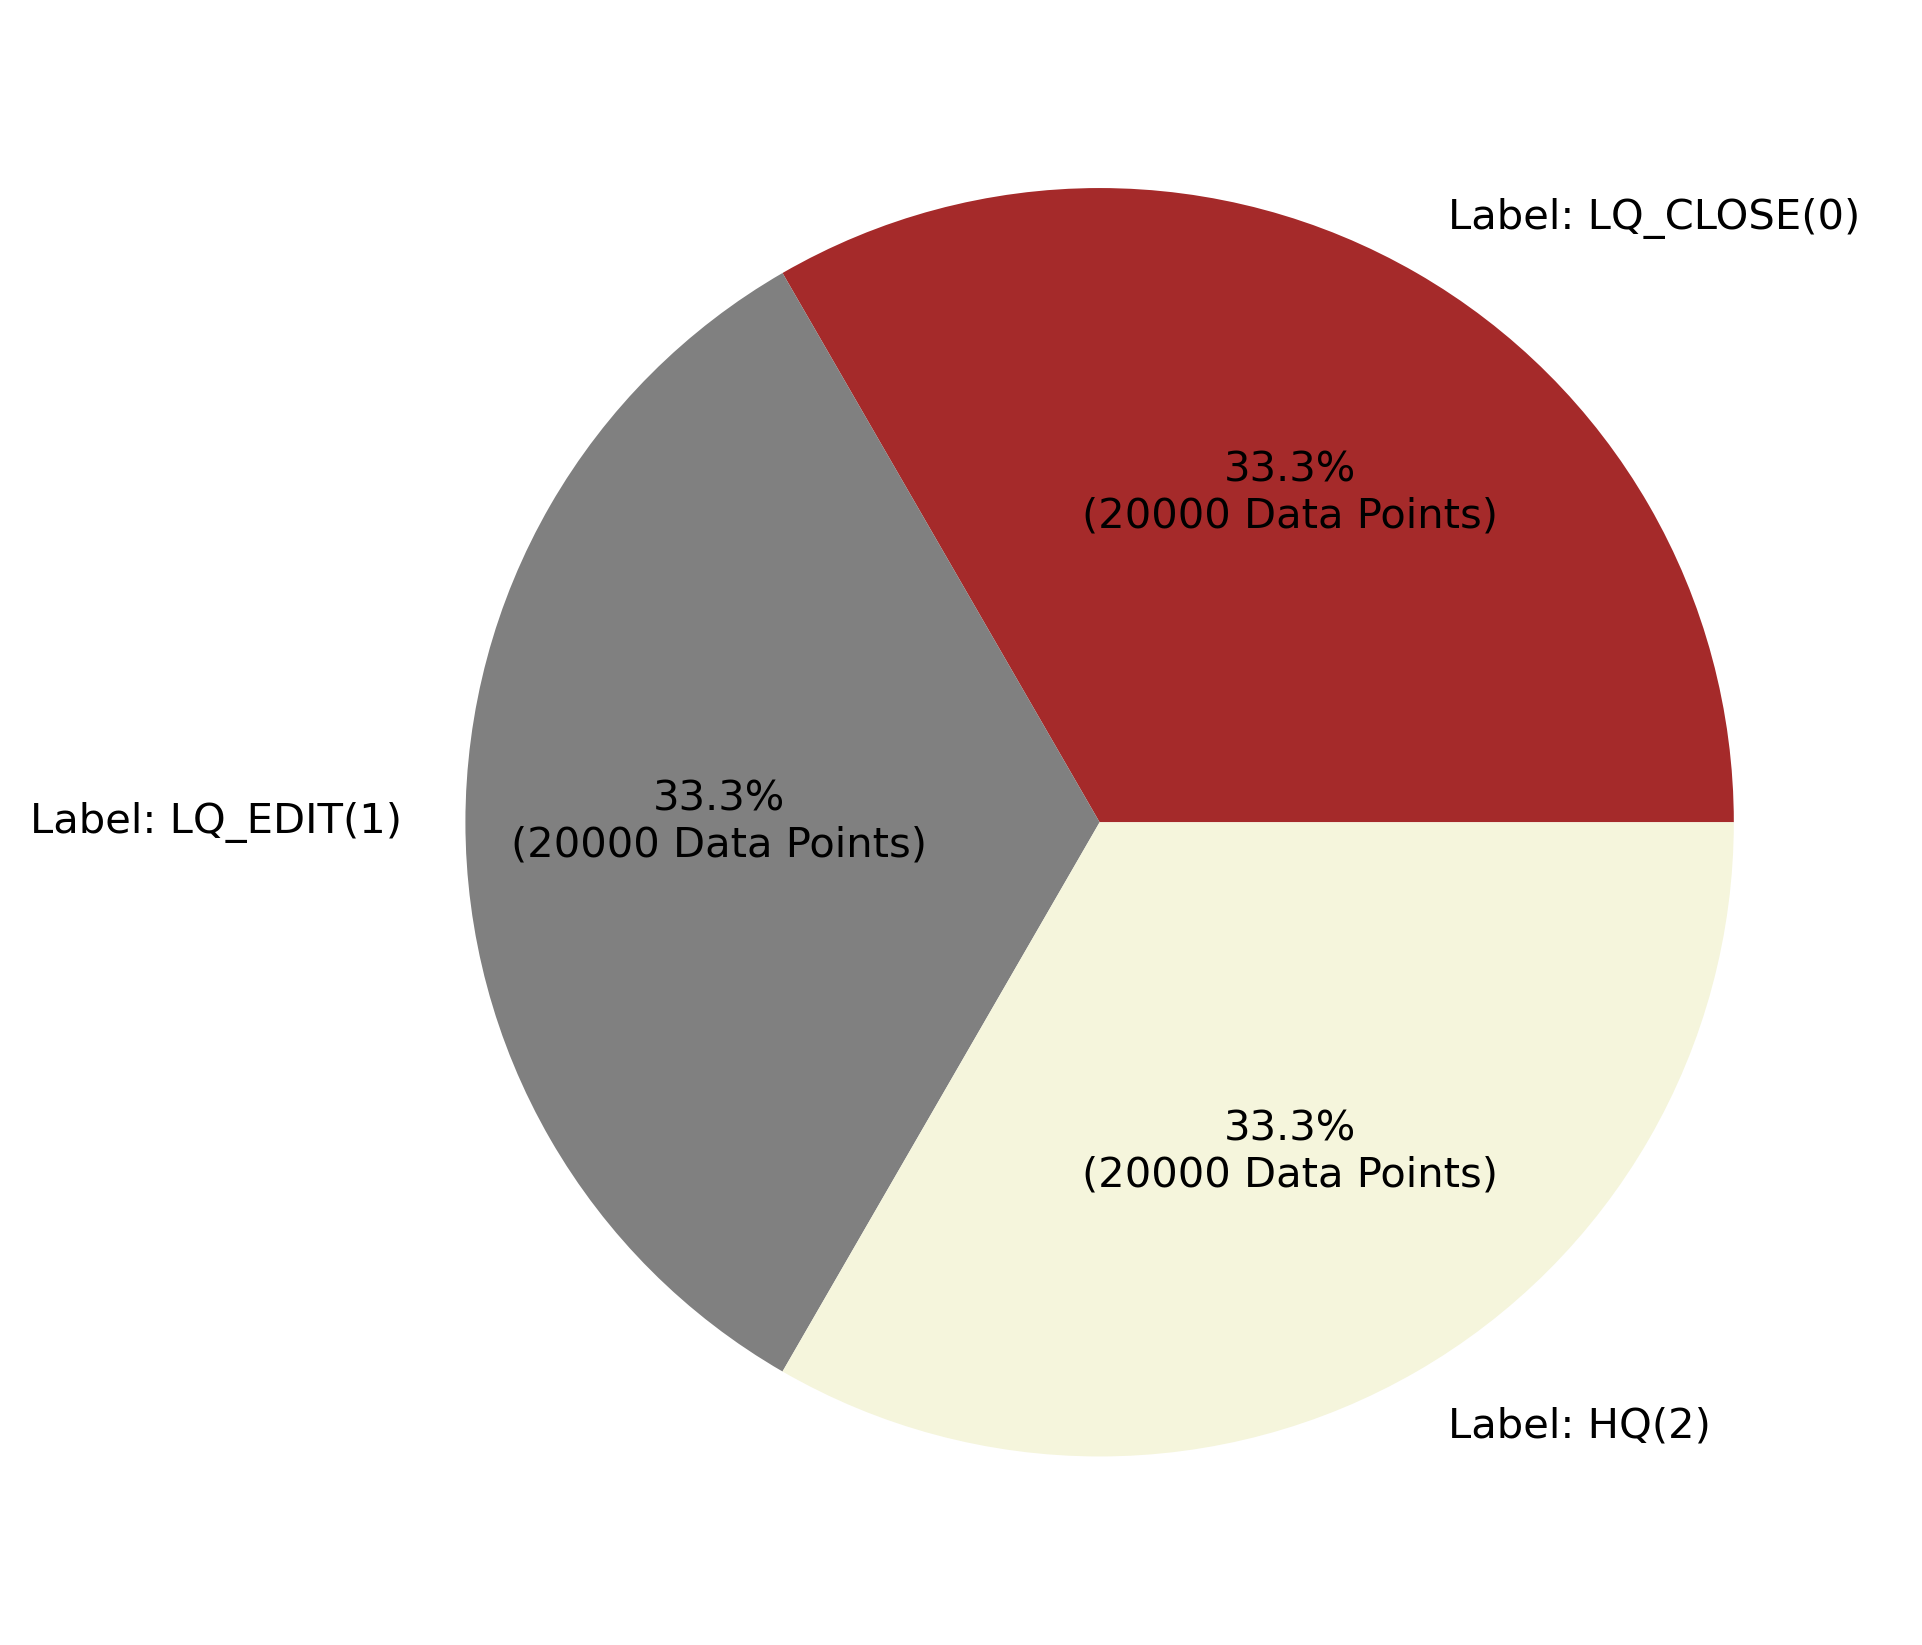

In [21]:
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} Data Points)".format(pct, absolute)

# Creating color parameters
colors = ("brown", "grey", "beige")

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7), dpi=300)
data = y_dist_data.values
ax.pie(data, 
       labels = ["Label: LQ_CLOSE(0)", "Label: LQ_EDIT(1)", "Label: HQ(2)"],
       autopct = lambda pct: func(pct, data),
       colors = colors)

# 2. Text Analysis

## 2.1 Text Length

In [29]:
all_data['total_length'] = all_data.title_length + all_data.body_length

In [30]:
top_length = np.percentile((all_data['total_length'].values), 99)
top_length

757.010000000002

In [42]:
# all_data.head()
# all_data.query('cleaned_y == 0 & total_length < {}'.format(top_length)).cleaned_y.unique()
all_data.cleaned_y.unique()

array([1, 0, 2])

<AxesSubplot:xlabel='total_length', ylabel='Count'>

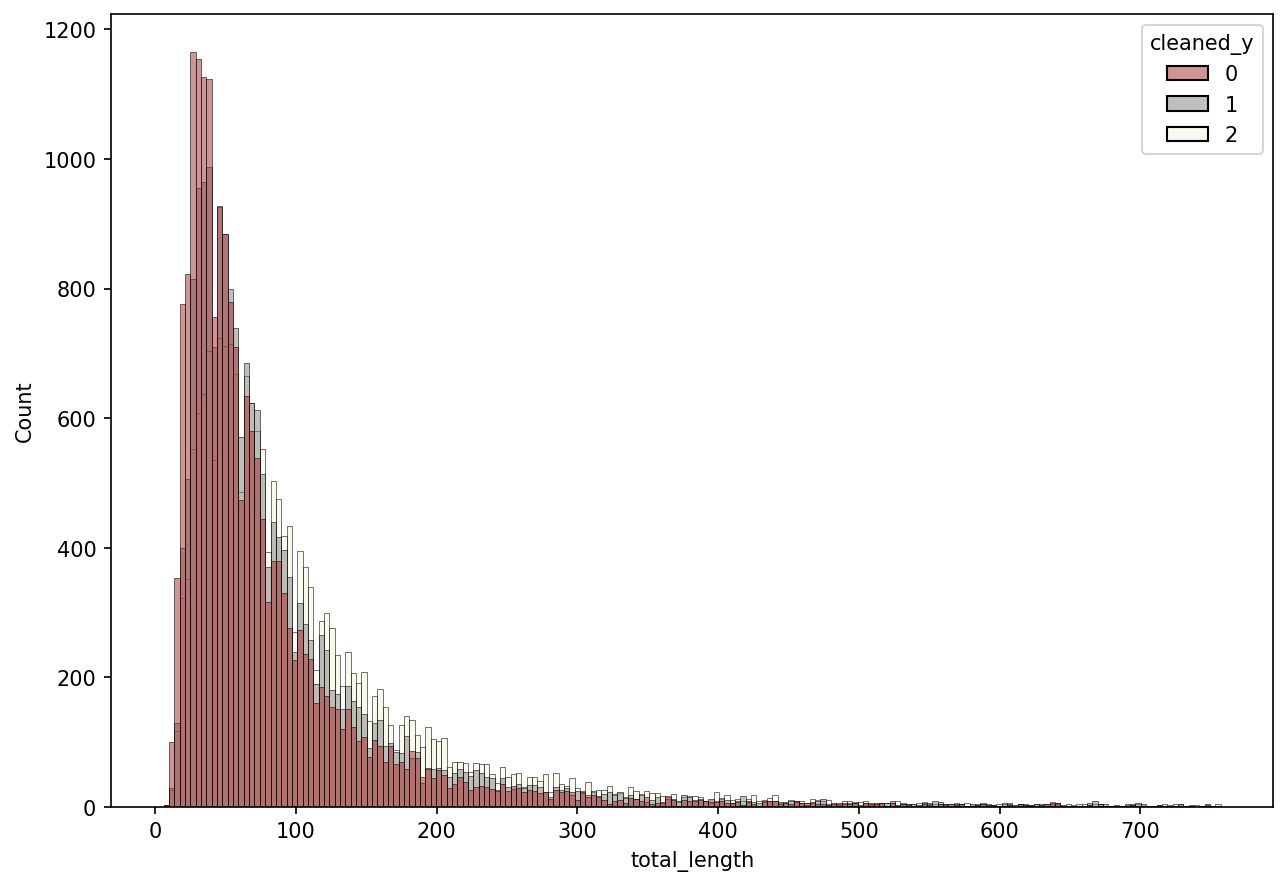

In [62]:
fig, ax = plt.subplots(figsize =(10, 7), dpi=150)
sns.histplot(data=all_data.query('total_length < {}'.format(top_length)), x="total_length", hue="cleaned_y", palette = ["brown", "grey", "beige"])


## 2.2 Frequent Words

In [63]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
from collections import Counter, defaultdict

In [73]:
train_corpus_hq = []
train_corpus_lq_edit = []
train_corpus_lq_close = []
for i in tqdm(range(train_df.shape[0])):
    curr_row = train_df.iloc[i]
    sent = curr_row.all_text
    if curr_row.cleaned_y == 0:
        for w in sent.split():
            train_corpus_lq_close.append(w)
    elif curr_row.cleaned_y == 1:
        for w in sent.split():
            train_corpus_lq_edit.append(w)
    else:
        for w in sent.split():
            train_corpus_hq.append(w)

100%|██████████| 35000/35000 [00:09<00:00, 3867.63it/s]


<BarContainer object of 10 artists>

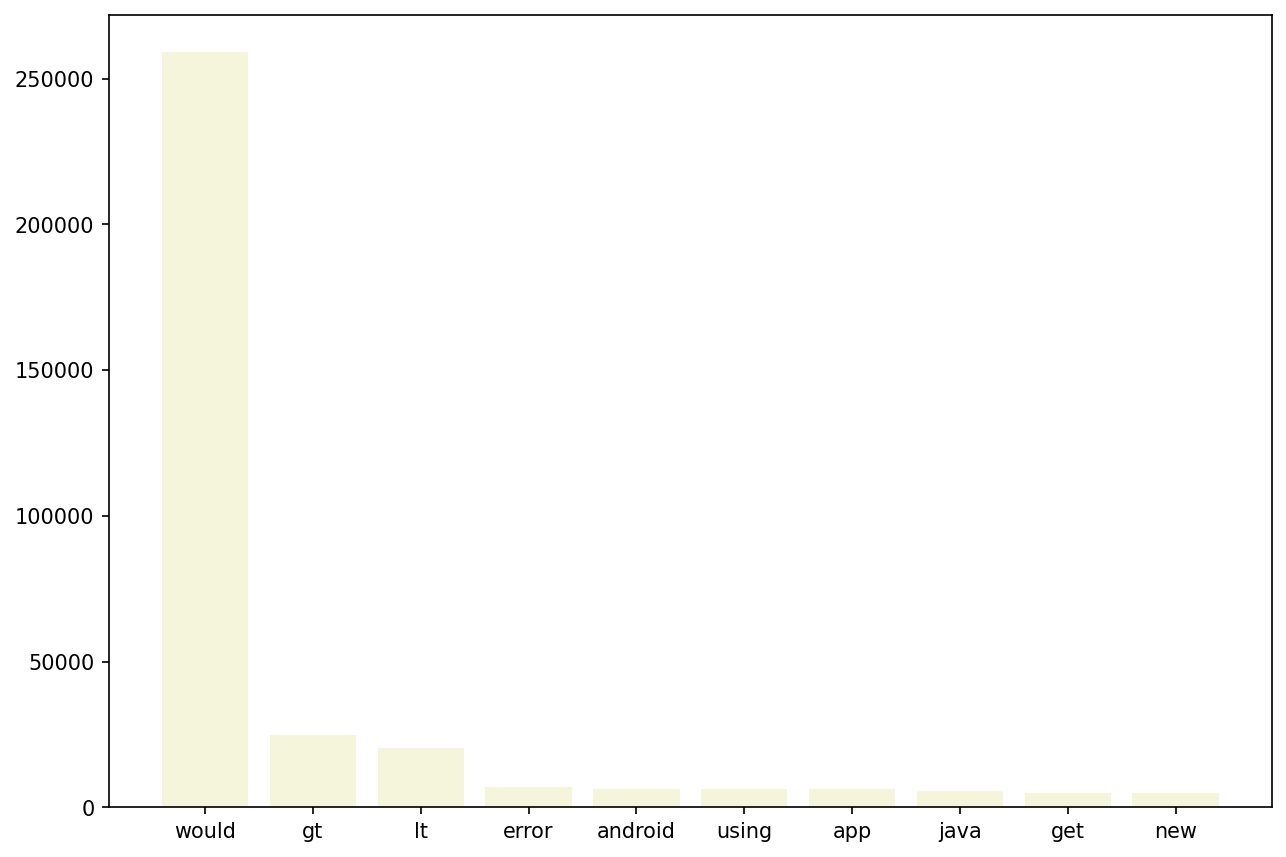

In [75]:
dic_hq = defaultdict(int)
for word in tqdm(train_corpus_hq):
    if word not in set(stopwords.words('english')):
        dic_hq[word] += 1
    
dic_hq = dict(dic_hq)

top = sorted(dic_hq.items(), key = lambda x:x[1], reverse = True)[:10]

x, y = zip(*top)
colors = ("brown", "grey", "beige")

fig, ax = plt.subplots(figsize =(10, 7), dpi=150)
plt.bar(x, y, color = "beige")

100%|██████████| 1268827/1268827 [02:46<00:00, 7611.32it/s]


<BarContainer object of 10 artists>

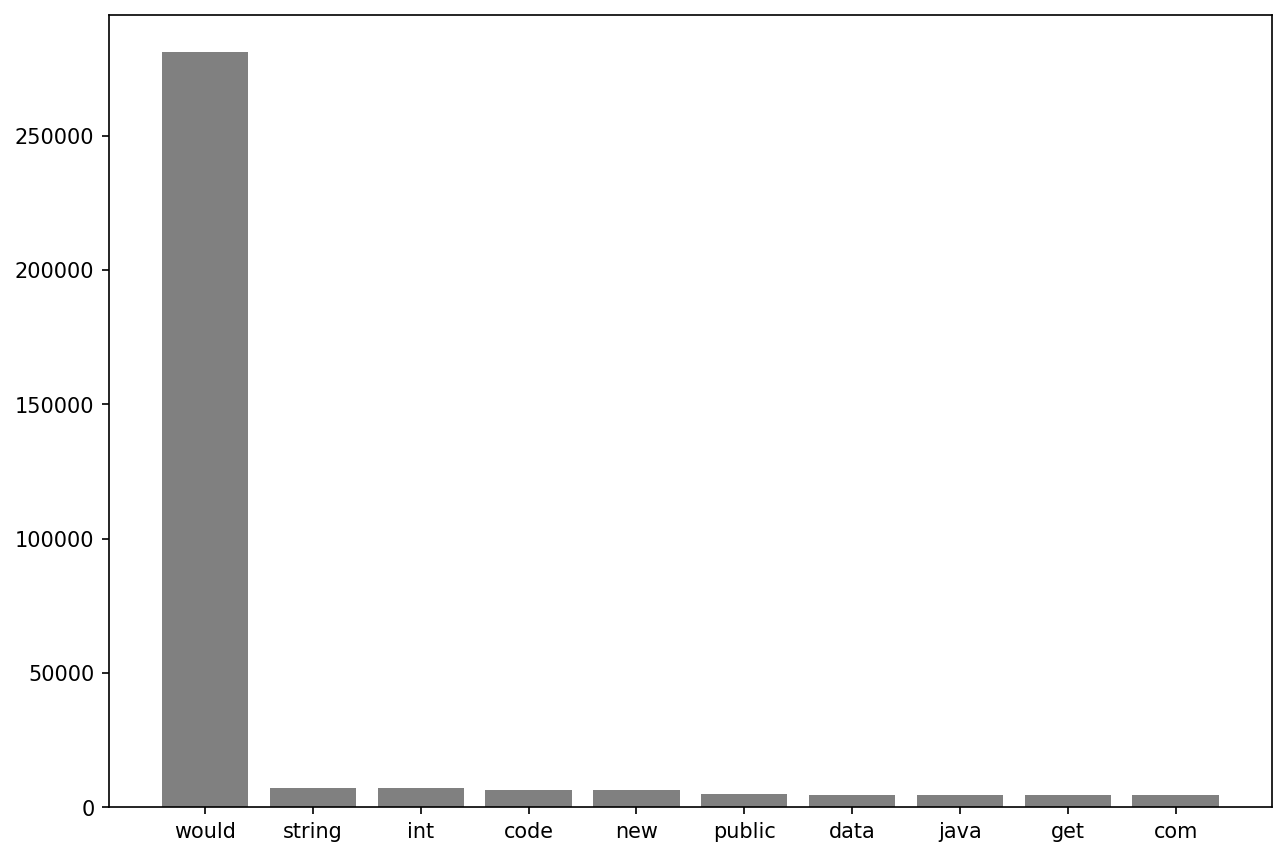

In [76]:
dic_lq_edit = defaultdict(int)
for word in tqdm(train_corpus_lq_edit):
    if word not in set(stopwords.words('english')):
        dic_lq_edit[word] += 1
    
dic_lq_edit = dict(dic_lq_edit)

top = sorted(dic_lq_edit.items(), key = lambda x:x[1], reverse = True)[:10]

x, y = zip(*top)
colors = ("brown", "grey", "beige")

fig, ax = plt.subplots(figsize =(10, 7), dpi=150)
plt.bar(x, y, color = "grey")

<BarContainer object of 10 artists>

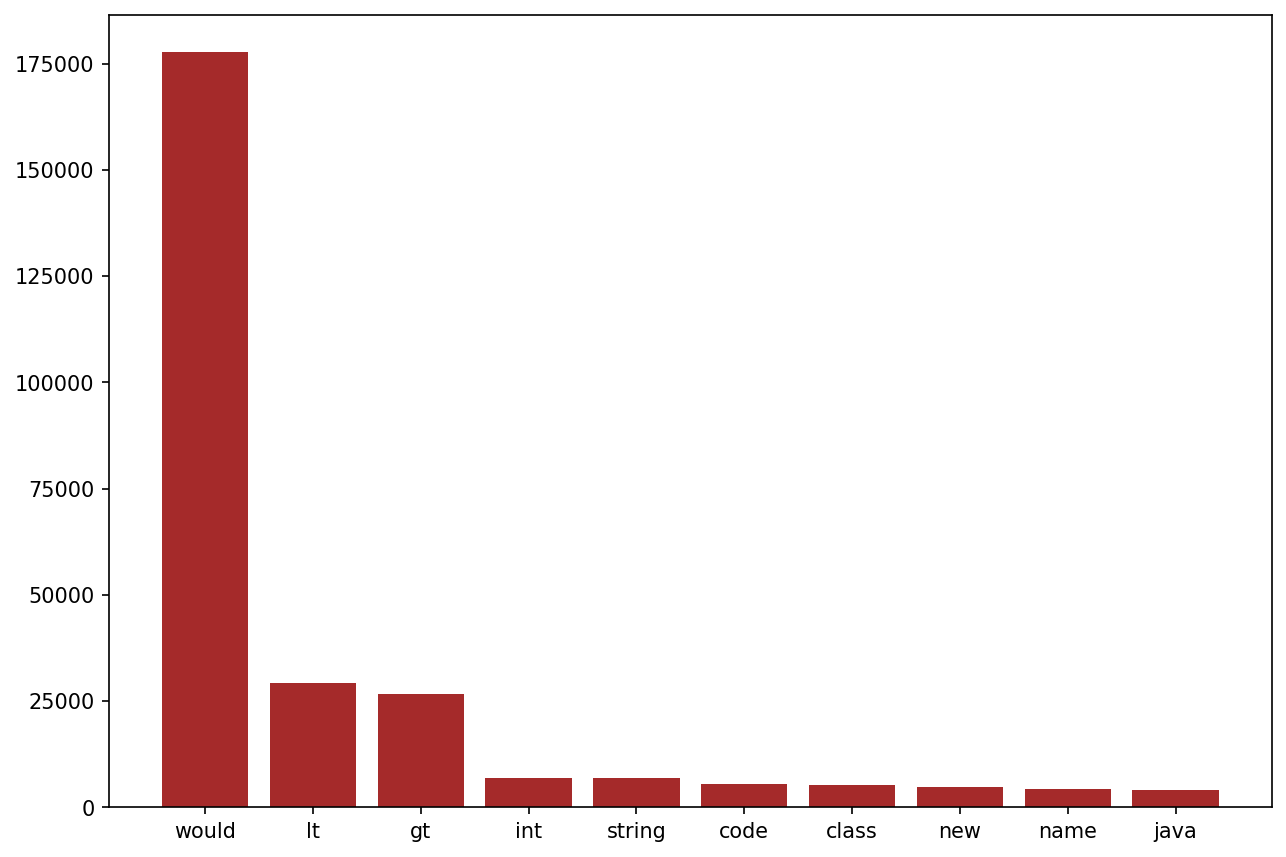

In [78]:
dic_lq_close = defaultdict(int)
for word in tqdm(train_corpus_lq_close):
    if word not in set(stopwords.words('english')):
        dic_lq_close[word] += 1
    
dic_lq_close = dict(dic_lq_close)

top = sorted(dic_lq_close.items(), key = lambda x:x[1], reverse = True)[:10]

x, y = zip(*top)
colors = ("brown", "grey", "beige")

fig, ax = plt.subplots(figsize =(10, 7), dpi=150)
plt.bar(x, y, color = "brown")